# Part I
We will treat this as a Time Series Analysis during the first part of this project.

In [1]:
# Load libraries
from dateutil.parser import parse
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi': 120})

In [2]:
#Import dataset as dataframe
df = pd.read_csv('garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
df.tail()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.9,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,NaN,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,Wednesday,6,0.70,2.9,NaN,720,0,0.0,0,0,6.0,0.394722


In [4]:
# convert date column to date data
df['Date'] = pd.to_datetime(df['date'])
df= df.drop(columns=['date'], axis = 1)
df = df.rename(columns = {'Date':'date'}, inplace=False)

In [5]:
#Check for null values
df.isnull().sum()

quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
date                       0
dtype: int64

In [6]:
# Select date and actual_productivity column into a new dataframe
Df = df[['date','actual_productivity']]
Df.head()

,date,actual_productivity
0,2015-01-01,0.940725
1,2015-01-01,0.886500
2,2015-01-01,0.800570
3,2015-01-01,0.800570
4,2015-01-01,0.800382


In [7]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 1197 non-null   datetime64[ns]
 1   actual_productivity  1197 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.8 KB


In [8]:
Df.describe()

,actual_productivity
count,1197.000000
mean,0.735091
std,0.174488
min,0.233705
25%,0.650307
50%,0.773333
75%,0.850253
max,1.120437


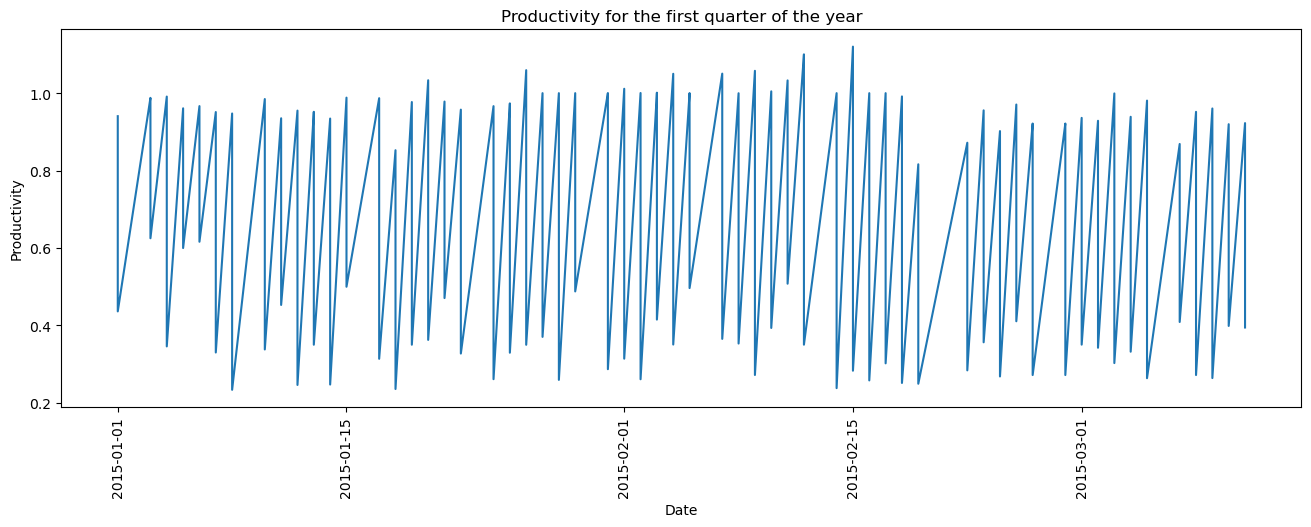

In [9]:
# Visualize time series
def plot_Df(df, x, y, title="", xlabel='Date', ylabel='Productivity', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.xticks(rotation = 90)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_Df(Df, x=Df.date, y=Df.actual_productivity, title='Productivity for the first quarter of the year')

In [10]:
# Sort the dataframe by 
df=df.sort_values(by =['team','date'], ascending=[True, True])
df.head(10)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,date
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,2015-01-01
9,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428,2015-01-01
23,Quarter1,finishing,Saturday,1,0.80,3.94,NaN,960,0,0.0,0,0,8.0,0.902917,2015-01-03
24,Quarter1,sweing,Saturday,1,0.80,28.08,772.0,6300,50,0.0,0,0,56.5,0.800725,2015-01-03
42,Quarter1,finishing,Sunday,1,0.80,3.94,NaN,960,0,0.0,0,0,8.0,0.915229,2015-01-04
49,Quarter1,sweing,Sunday,1,0.80,26.16,1033.0,7080,63,0.0,0,0,59.0,0.800319,2015-01-04
61,Quarter1,finishing,Monday,1,0.80,3.94,NaN,1920,0,0.0,0,0,8.0,0.961059,2015-01-05
70,Quarter1,sweing,Monday,1,0.80,26.16,1138.0,7080,63,0.0,0,0,59.0,0.800319,2015-01-05
84,Quarter1,finishing,Tuesday,1,0.80,3.94,NaN,1440,0,0.0,0,0,8.0,0.936496,2015-01-06
88,Quarter1,sweing,Tuesday,1,0.80,26.16,1187.0,10620,75,0.0,0,0,59.0,0.850502,2015-01-06


In [11]:
df.tail(10)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,date
1087,Quarter1,finishing,Saturday,12,0.8,4.60,NaN,1080,0,0.0,0,0,9.0,0.868889,2015-03-07
1088,Quarter1,sweing,Saturday,12,0.8,15.26,986.0,4080,75,0.0,0,0,34.0,0.850521,2015-03-07
1107,Quarter2,finishing,Sunday,12,0.8,4.60,NaN,1080,0,0.0,0,0,9.0,0.945556,2015-03-08
1116,Quarter2,sweing,Sunday,12,0.8,15.26,1064.0,4080,63,0.0,0,0,34.0,0.800402,2015-03-08
1129,Quarter2,finishing,Monday,12,0.8,4.60,NaN,0,1080,0.0,0,0,9.0,0.902963,2015-03-09
1135,Quarter2,sweing,Monday,12,0.8,15.26,1132.0,4080,63,0.0,0,0,34.0,0.800402,2015-03-09
1150,Quarter2,finishing,Tuesday,12,0.8,4.60,NaN,1080,0,0.0,0,0,9.0,0.920000,2015-03-10
1158,Quarter2,sweing,Tuesday,12,0.8,15.26,1069.0,4080,63,0.0,0,0,34.0,0.800402,2015-03-10
1173,Quarter2,finishing,Wednesday,12,0.8,4.60,NaN,2160,0,0.0,0,0,9.0,0.922840,2015-03-11
1178,Quarter2,sweing,Wednesday,12,0.8,15.26,470.0,4080,63,0.0,0,0,34.0,0.800402,2015-03-11


In [12]:
# split the dataset into team 1 to team 12
def dfi(i):
    dfi =df[['date','actual_productivity']][df.team==i] 
    return dfi

In [13]:
dfi(1)

,date,actual_productivity
1,2015-01-01,0.886500
9,2015-01-01,0.750428
23,2015-01-03,0.902917
24,2015-01-03,0.800725
42,2015-01-04,0.915229
...,...,...
1139,2015-03-09,0.794567
1152,2015-03-10,0.900061
1155,2015-03-10,0.880754
1177,2015-03-11,0.812625


							Productivity for team 1


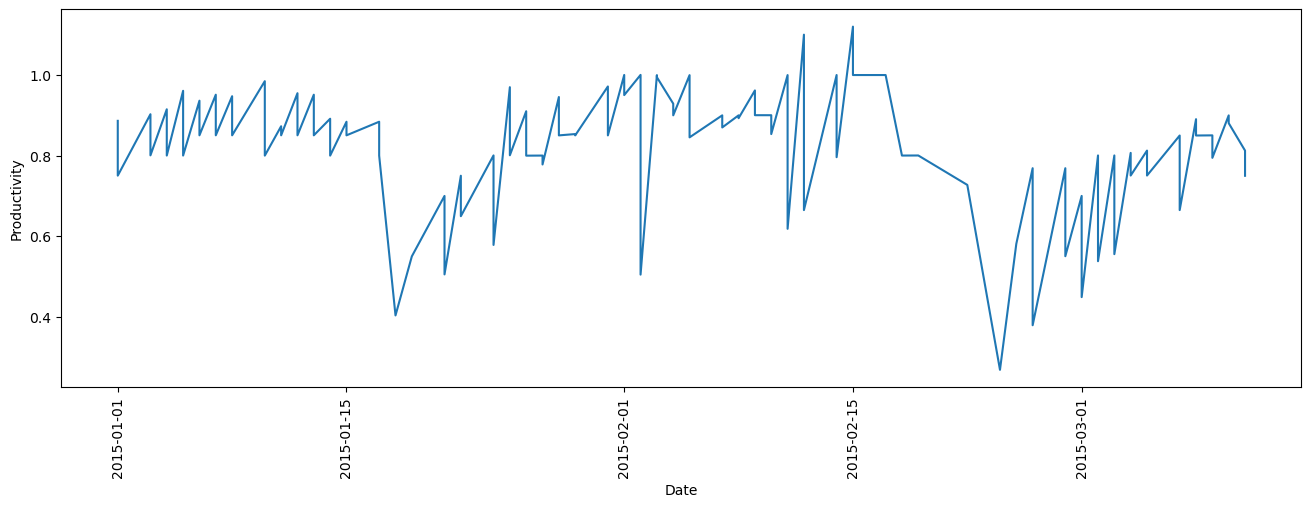

							Productivity for team 2


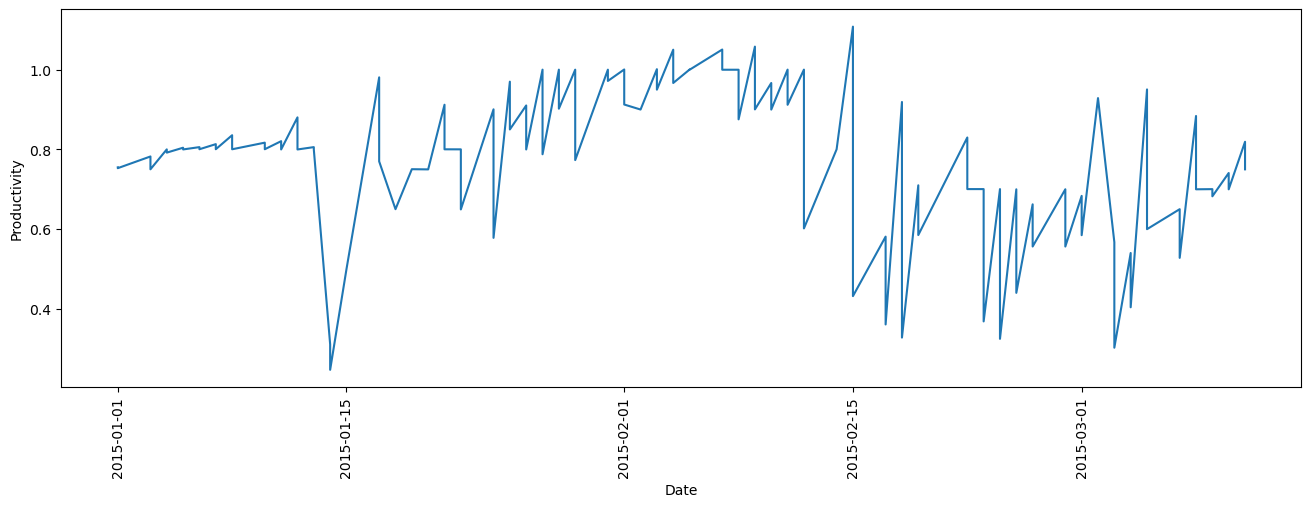

							Productivity for team 3


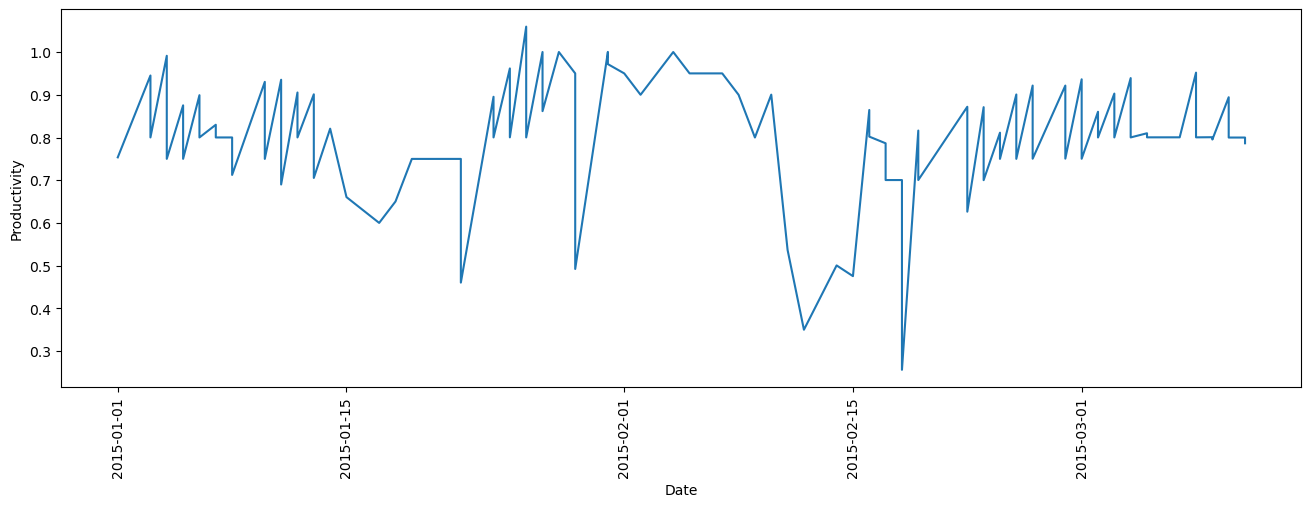

							Productivity for team 4


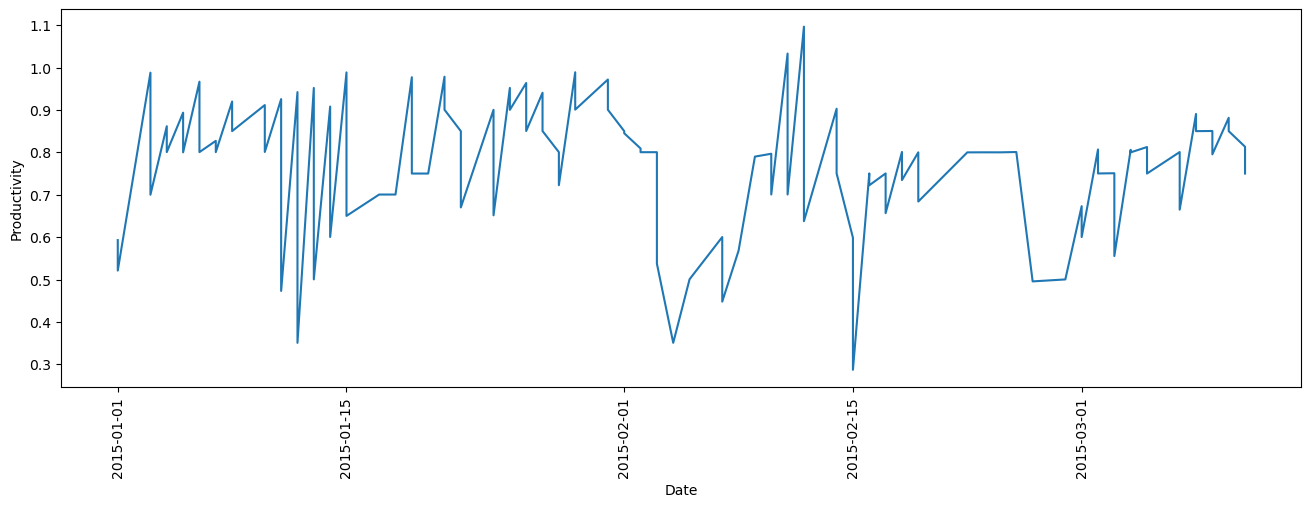

							Productivity for team 5


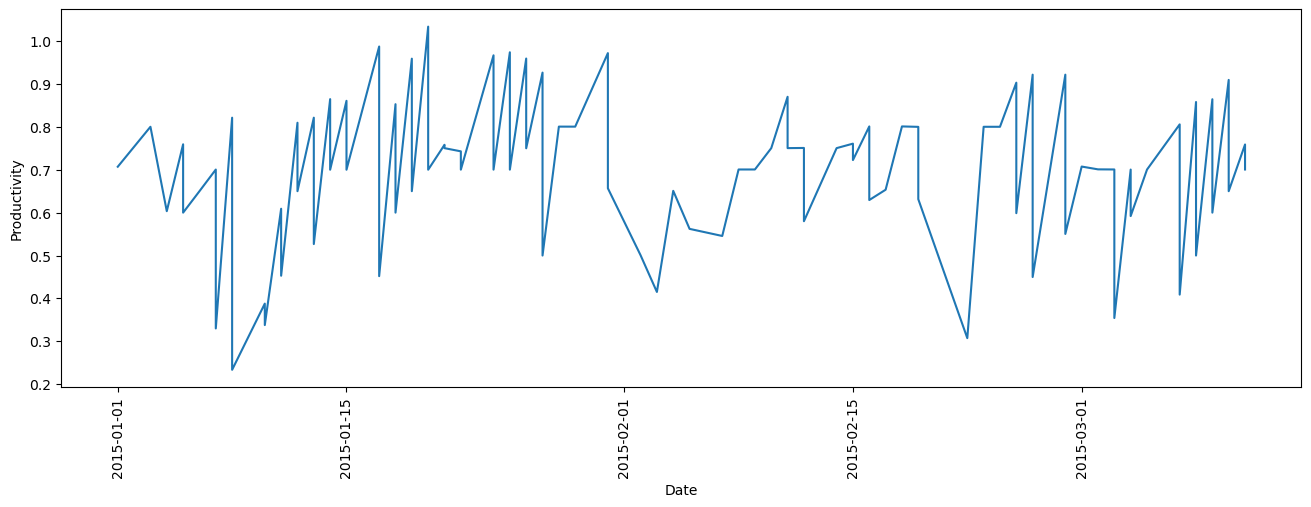

							Productivity for team 6


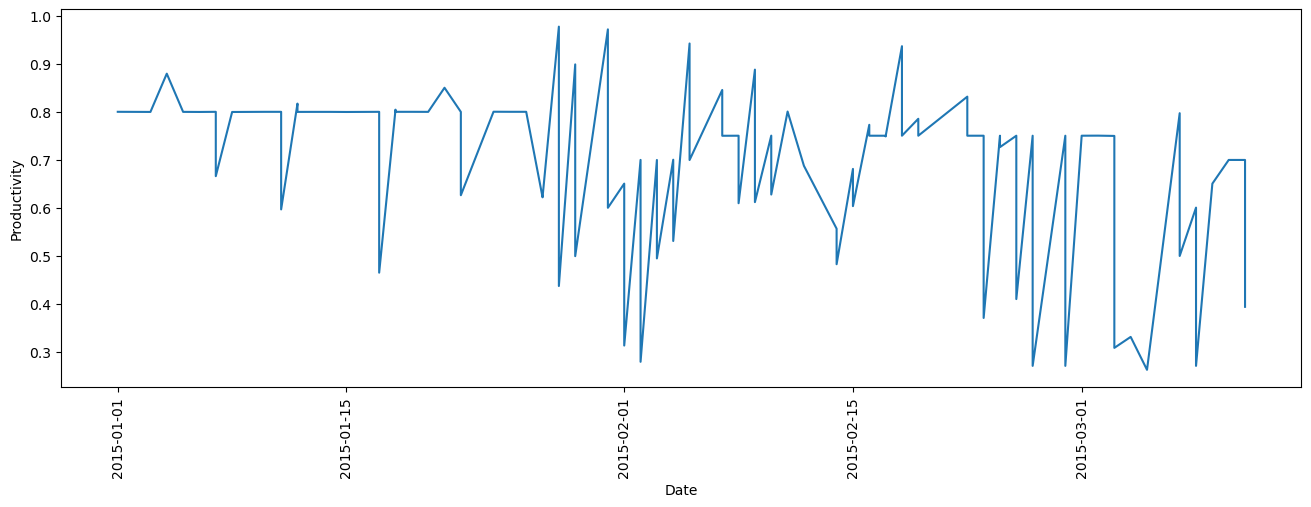

							Productivity for team 7


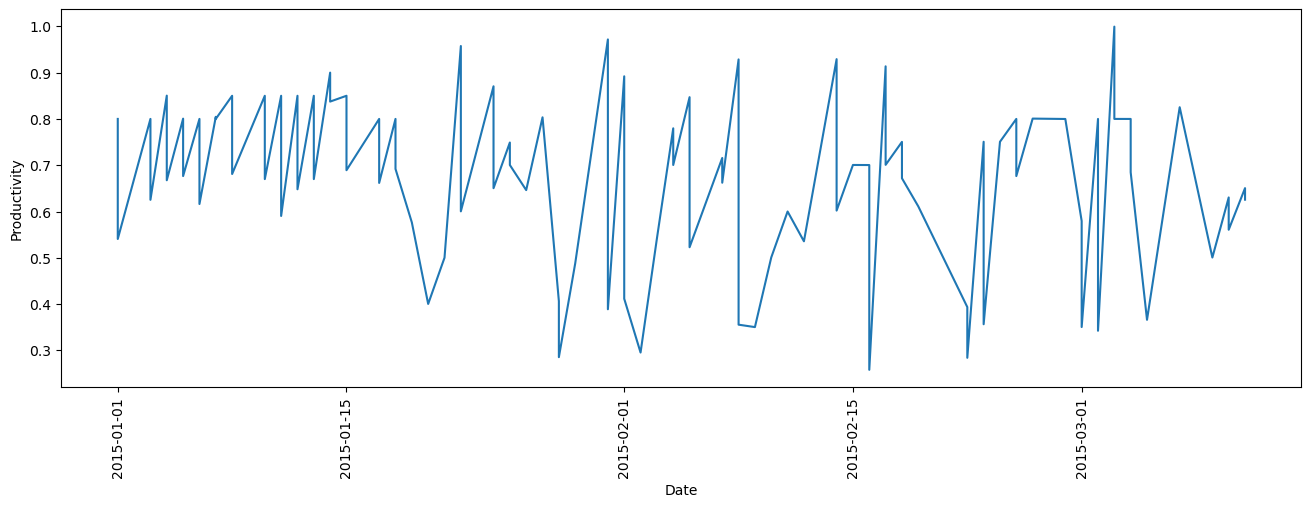

							Productivity for team 8


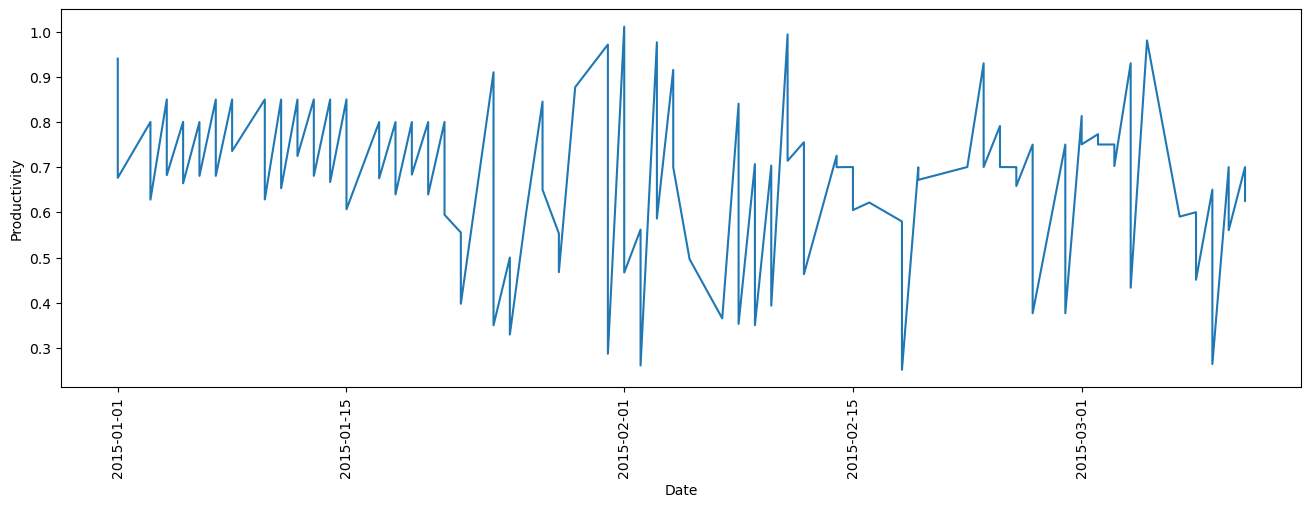

							Productivity for team 9


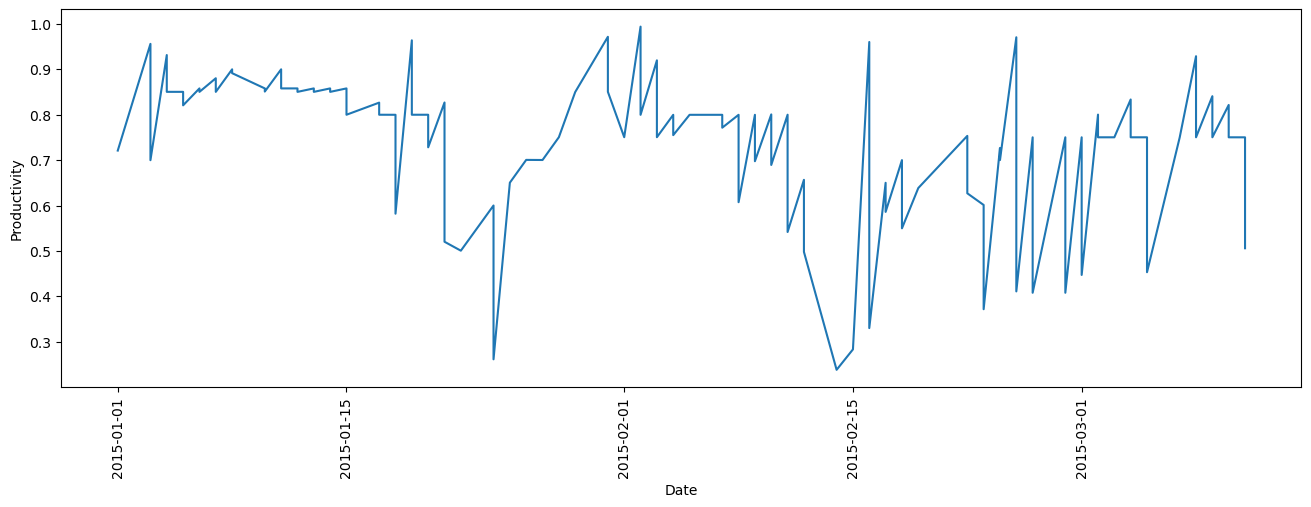

							Productivity for team 10


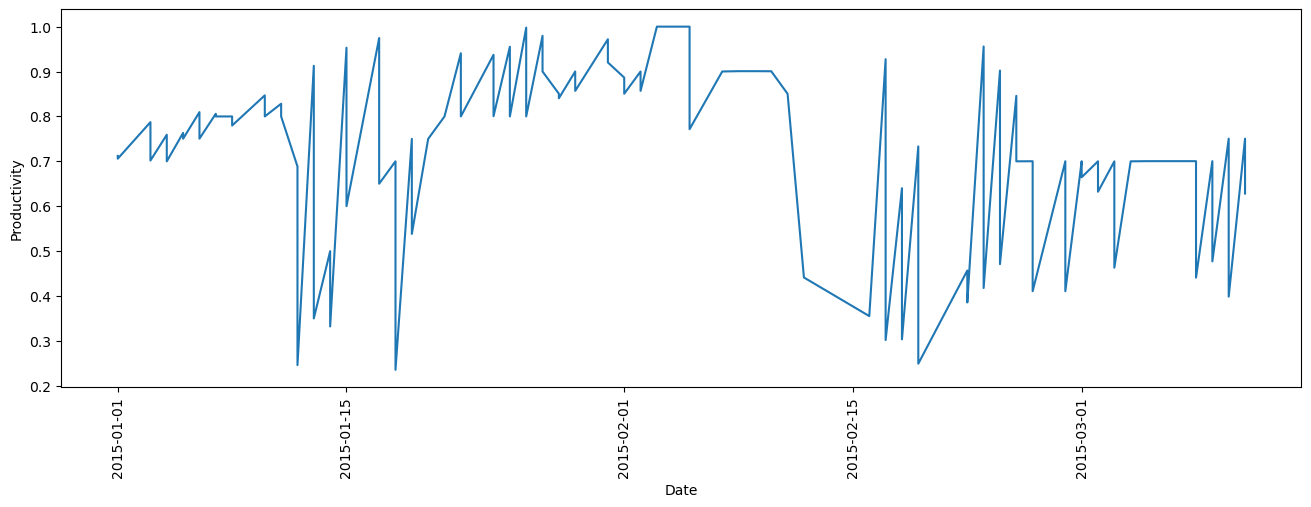

							Productivity for team 11


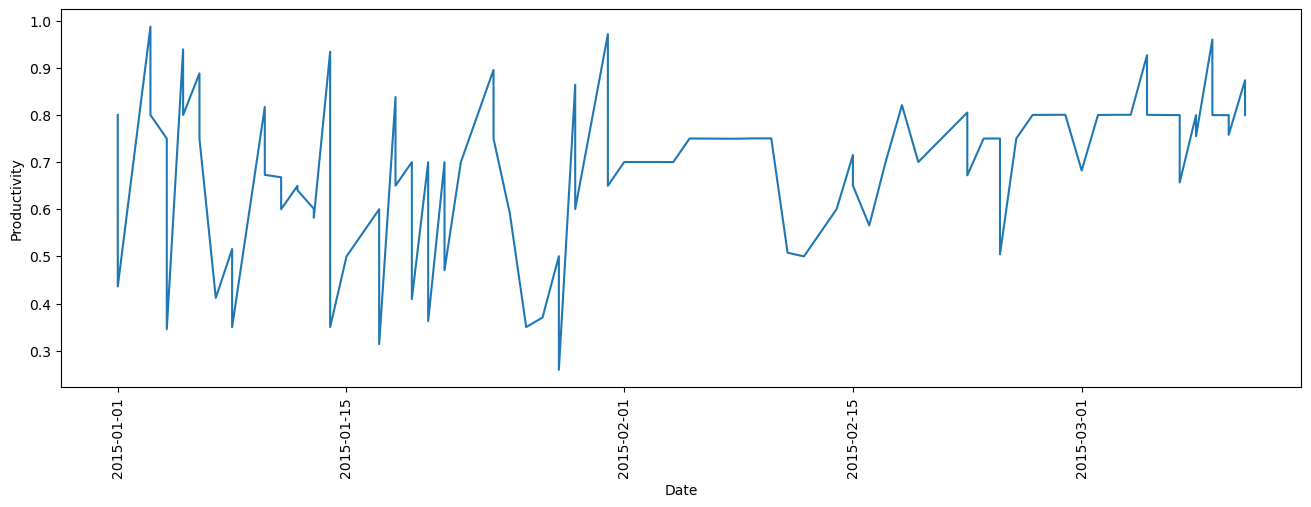

							Productivity for team 12


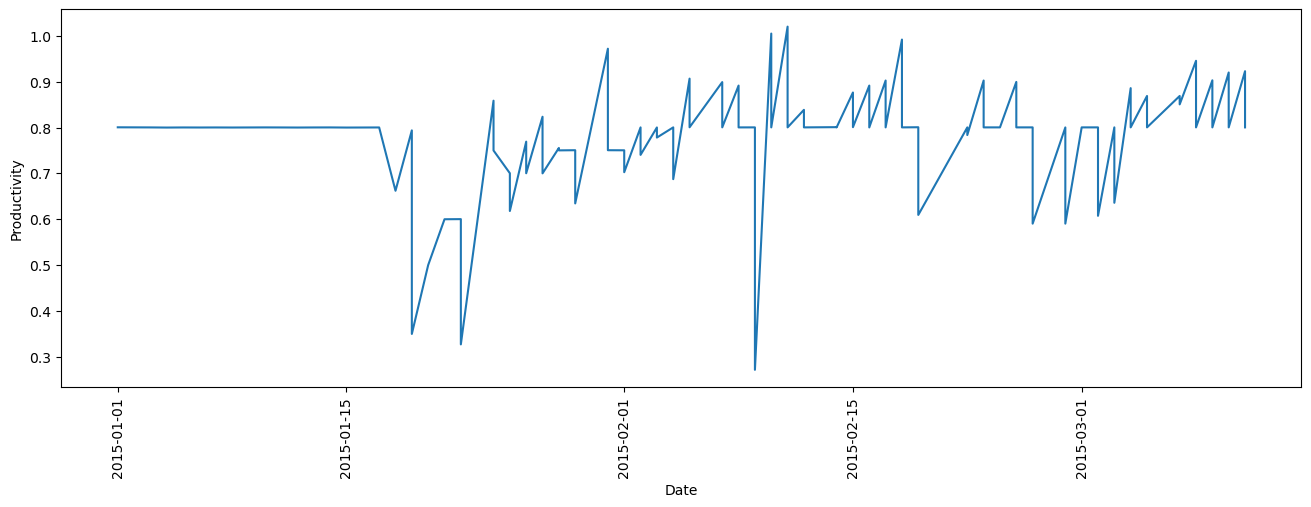

In [14]:
# Let's visualize the time series of each team
for i in range(1,13):
    dfl = dfi(i)
    plot_Df(dfl, x=dfl.date, y=dfl.actual_productivity, title=print(f"\t\t\t\t\t\t\tProductivity for team {i}"))

In [15]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

<AxesSubplot:xlabel='date', ylabel='actual_productivity'>

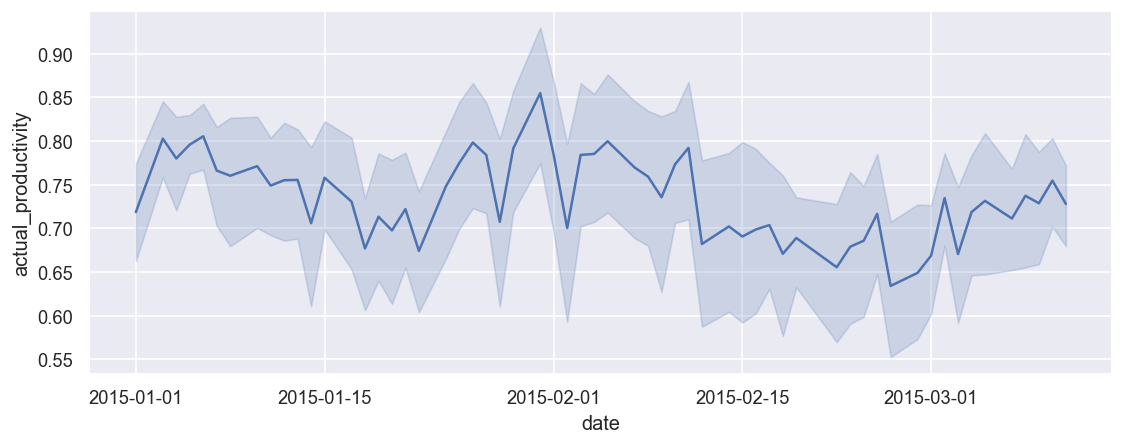

In [16]:
sns.lineplot(x='date', y='actual_productivity',data = df)

In [17]:
# Stationarity test on time series for different teams
from statsmodels.tsa.stattools import adfuller

In [18]:
for i in range (1,13):
    result = adfuller(dfi(i)['actual_productivity'], autolag='AIC')
    print(f'ADF result for team:{i}')
    print(f'ADF Statistic: {result[0]}')
    print(f'n_lags: {result[2]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')
    print('\n')

ADF result for team:1
ADF Statistic: -2.9782644949939403
n_lags: 4
p-value: 0.03697468545414004
Critial Values:
   1%, -3.497501033
Critial Values:
   5%, -2.89090644
Critial Values:
   10%, -2.5824349


ADF result for team:2
ADF Statistic: -2.165203072125002
n_lags: 3
p-value: 0.21911617888484936
Critial Values:
   1%, -3.4942202045135513
Critial Values:
   5%, -2.889485291005291
Critial Values:
   10%, -2.5816762131519275


ADF result for team:3
ADF Statistic: -4.2385839798194525
n_lags: 2
p-value: 0.0005665189883115823
Critial Values:
   1%, -3.503514579651927
Critial Values:
   5%, -2.893507960466837
Critial Values:
   10%, -2.583823615311909


ADF result for team:4
ADF Statistic: -3.9051511579675027
n_lags: 4
p-value: 0.001997262783372491
Critial Values:
   1%, -3.497501033
Critial Values:
   5%, -2.89090644
Critial Values:
   10%, -2.5824349


ADF result for team:5
ADF Statistic: -3.2672428351195846
n_lags: 3
p-value: 0.01640774323118114
Critial Values:
   1%, -3.506057133647011


The results suggest that apart from the time series for teams 2,7,8, and 10, which are non-stationary, the others are stationary.

In [19]:
# Stationary test on actual productivity time series data as a whole.
result = adfuller(Df['actual_productivity'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.089394972220049
n_lags: 20
p-value: 0.0010083639525049711
Critial Values:
   1%, -3.4359228156852093
Critial Values:
   5%, -2.8640008242280555
Critial Values:
   10%, -2.5680801943923828


In [20]:
#rolling statistics
rolmean = Df.rolling(window=92).mean()
rolstd= Df.rolling(window=92).std()

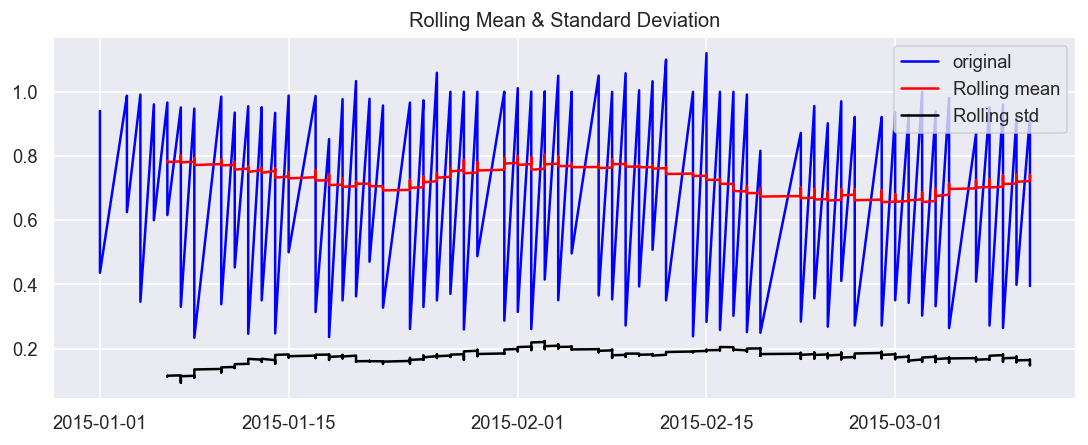

In [21]:
orig = plt.plot(Df.date, Df.actual_productivity, color='blue', label='original')
mean = plt.plot(Df.date, rolmean, color='red', label='Rolling mean')
std = plt.plot(Df.date, rolstd, color='black', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

The ADF stationarity test and the plots above confirm that the time series is stationary.

Still let's try to decompose this

In [22]:
# Let's smoothen the curve for better approximation
from statsmodels.tsa.seasonal import seasonal_decompose

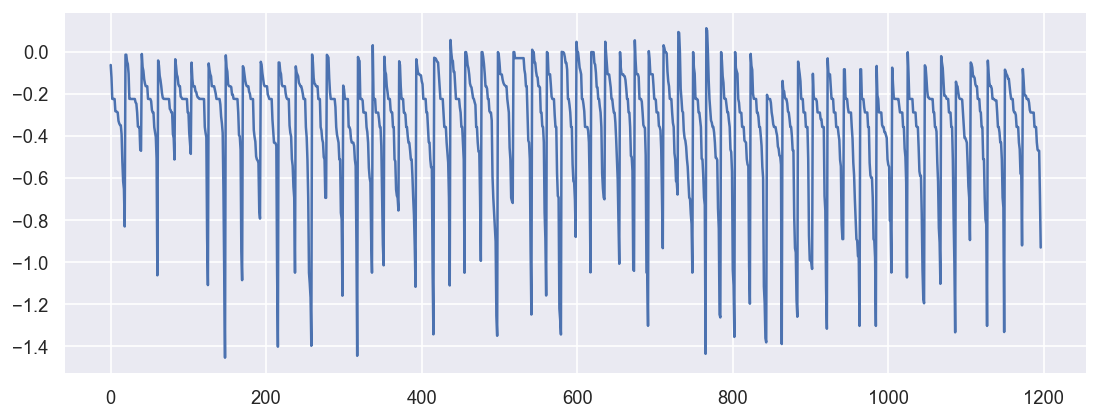

In [23]:
# Estimating trend
Df_log = np.log(Df['actual_productivity'])
plt.plot(Df_log)

In [24]:
#Let's calculate the new moving average and moving std
rolmean_log = Df_log.rolling(window=92).mean()
rolstd_log= Df_log.rolling(window=92).std()

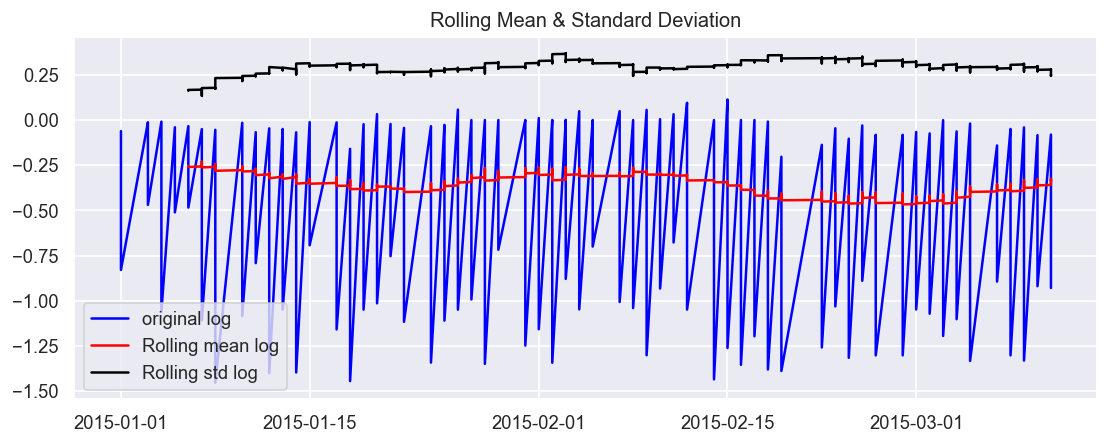

In [25]:
orig = plt.plot(Df.date, Df_log, color='blue', label='original log')
mean = plt.plot(Df.date, rolmean_log, color='red', label='Rolling mean log')
std = plt.plot(Df.date, rolstd_log, color='black', label='Rolling std log')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [26]:
# stationarity test 
result = adfuller(Df_log, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.263033438057906
n_lags: 21
p-value: 0.0005144478554185878
Critial Values:
   1%, -3.4359275689289652
Critial Values:
   5%, -2.864002921196267
Critial Values:
   10%, -2.56808131118153


Smoothening the curve brings nothing new.

C:\Users\ESSOH GO\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


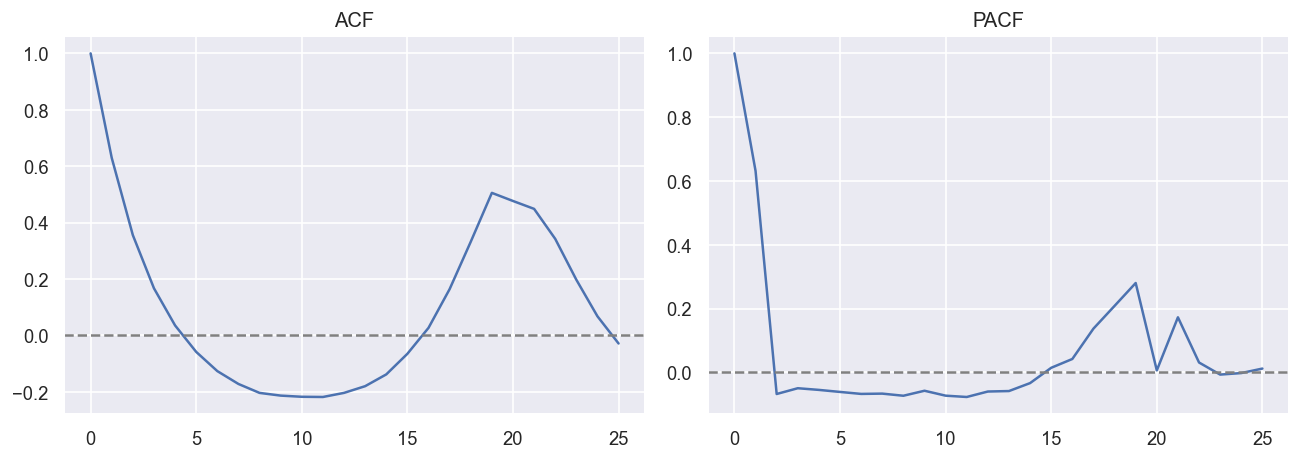

In [27]:
# Let's determine p and qvalues for ARIMA model 
from statsmodels.tsa.stattools import acf, pacf

acf = acf(Df.actual_productivity, nlags=25)
pacf = pacf(Df.actual_productivity, nlags=25, method='ols')

#plot ACF:
plt.subplot(121)
plt.plot(acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.title('ACF')

#plot PACF:
plt.subplot(122)
plt.plot(pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.title('PACF')
plt.tight_layout()

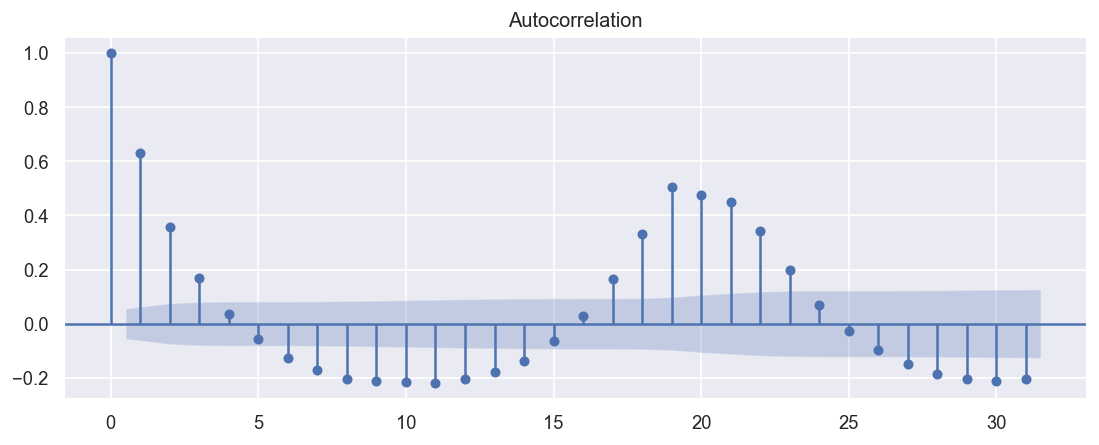

In [28]:
#ACF plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(Df.actual_productivity)
plt.show()

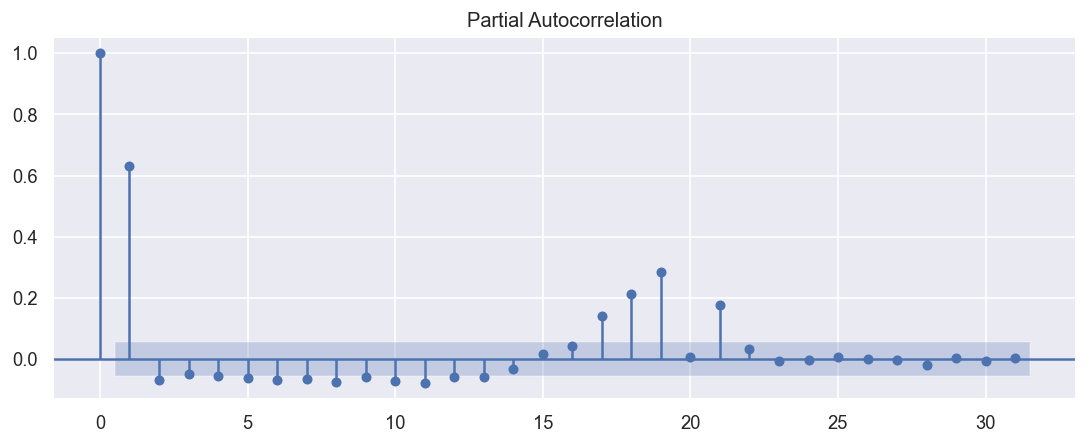

In [29]:
#PACF plot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(Df.actual_productivity)
plt.show()

The preceding graphs make it possible to visually determine the parameters p and q of the ARMA model. ACF approximately gives us a value of q=4, and PACF provides us with p=2.

C:\Users\ESSOH GO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Model ARIMA


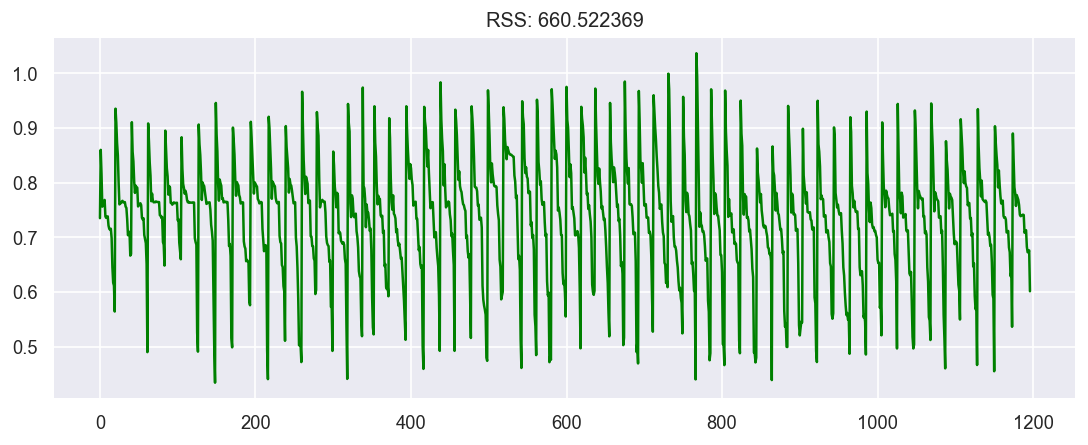

In [30]:
# Let's initialize the model ARIMA with d=0
from statsmodels.tsa.arima_model import ARIMA

model= ARIMA(Df['actual_productivity'], order=(1, 0, 5))
results1 = model.fit(disp=-1)
plt.plot(results1.fittedvalues, color='green')
plt.title('RSS: %4f' % sum((results1.fittedvalues)**2))
print('Model ARIMA')

In [31]:
#Let's make some predictions
predictions = pd.Series(results1.fittedvalues, copy=True)
print(predictions.head(10))

0    0.735046
1    0.860036
2    0.816056
3    0.756091
4    0.758000
5    0.761120
6    0.768396
7    0.738186
8    0.735550
9    0.737654
dtype: float64


In [32]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Df.actual_productivity, predictions)
print('MAE: %f' % mae)

MAE: 0.081362


In [33]:
#Mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Df.actual_productivity, predictions)
print('MSE: %f' % mse)

MSE: 0.018124


In [37]:
# Root Mean squared Error
rmse = np.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.134626


In [38]:
# R_squared
from sklearn.metrics import r2_score
r_squared = r2_score(Df.actual_productivity, predictions)
print('R_SQUARED: %f' % r_squared)

R_SQUARED: 0.404218


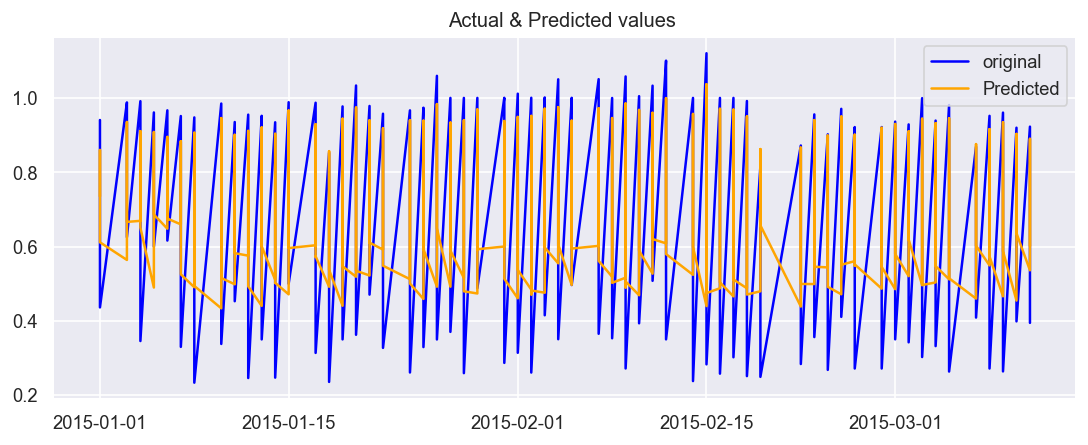

In [39]:
#let's plot the actual values vs the predicted values
actual = plt.plot(Df.date, Df['actual_productivity'], color='blue', label='original')
predicted = plt.plot(Df.date, predictions, color='orange', label='Predicted')
plt.legend(loc='best')
plt.title('Actual & Predicted values ')
plt.show(block=False)

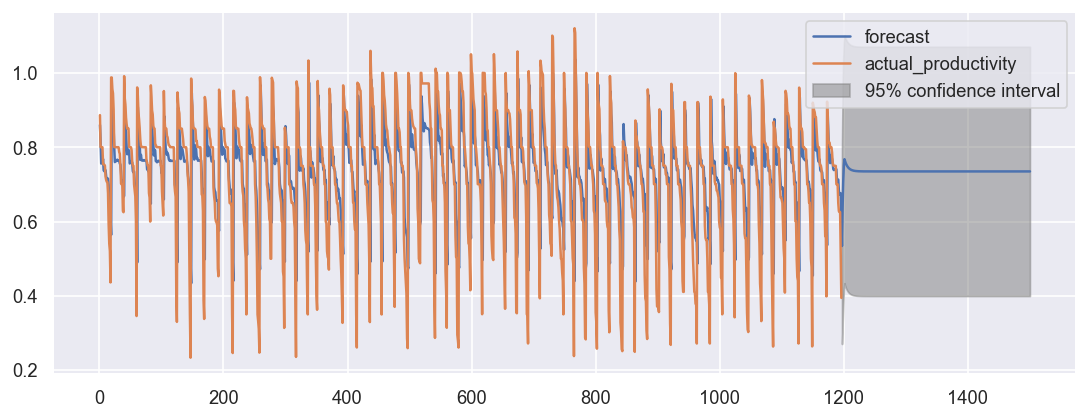

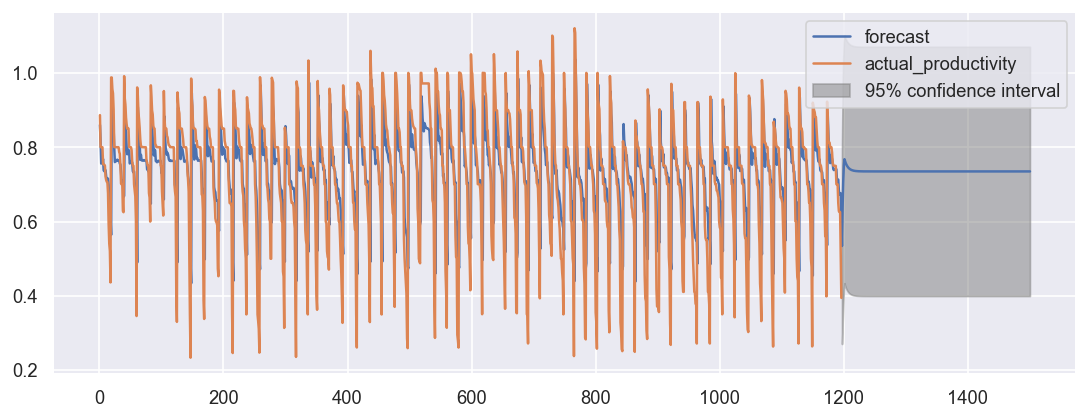

In [40]:
#Let's predict value for the next 100 days
results1.plot_predict(1,1500)

In [41]:
# Let's forecast the values for quarter 3 and 4
x = results1.forecast(steps=30)
x

(array([0.53431782, 0.63632402, 0.70550913, 0.75062597, 0.76794138,
        0.76229937, 0.75762503, 0.7537524 , 0.75054397, 0.74788583,
        0.74568359, 0.74385907, 0.74234747, 0.74109513, 0.74005758,
        0.73919798, 0.73848582, 0.7378958 , 0.73740698, 0.73700199,
        0.73666647, 0.73638849, 0.73615819, 0.73596738, 0.73580931,
        0.73567834, 0.73556984, 0.73547995, 0.73540547, 0.73534377]),
 array([0.13457525, 0.16085017, 0.16861877, 0.170243  , 0.1702915 ,
        0.17056522, 0.17075285, 0.17088152, 0.17096978, 0.17103033,
        0.17107188, 0.1711004 , 0.17111997, 0.1711334 , 0.17114261,
        0.17114894, 0.17115328, 0.17115627, 0.17115831, 0.17115972,
        0.17116068, 0.17116134, 0.1711618 , 0.17116211, 0.17116232,
        0.17116247, 0.17116257, 0.17116264, 0.17116269, 0.17116272]),
 array([[0.27055518, 0.79808047],
        [0.32106347, 0.95158457],
        [0.37502241, 1.03599585],
        [0.41695583, 1.08429611],
        [0.43417617, 1.10170658],
        [0

# Part II

Let's use a regression to predict employees performance

In [42]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sn

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from math import sqrt
from scipy.stats import norm
from matplotlib import pyplot
from __future__ import print_function, division
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

In [43]:
# Load csv file into a dataframe
df_original = pd.read_csv('garments_worker_productivity.csv')

In [44]:
# head
df_original.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [45]:
# tail
df_original.tail()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.9,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,NaN,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,Wednesday,6,0.70,2.9,NaN,720,0,0.0,0,0,6.0,0.394722


## Exploratory Data Analysis

In [46]:
# Dataframe info
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [47]:
# Data frame description
df_original.describe(include='all')

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197,1197,1197,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
unique,59,5,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3/11/2015,Quarter1,sweing,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,360,691,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,NaN,NaN,NaN,NaN,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,NaN,NaN,NaN,NaN,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,NaN,NaN,NaN,NaN,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,NaN,NaN,NaN,NaN,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,NaN,NaN,NaN,NaN,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253


In [48]:
# Check dataframe shape
df_original.shape

(1197, 15)

In [49]:
# Check for null values
df_original.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [50]:
# Set up data column as index
df_original.set_index("date", inplace=True)

In [51]:
df_original.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [52]:
#check unique value to detect any typo
df_original.department.unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [53]:
#Replace wrong values 
df_original.replace(to_replace ='finishing ', value='finishing', inplace= True)

In [54]:
df_original.replace(to_replace ='sweing', value='sewing', inplace= True)

In [55]:
print(df_original.department.unique())

['sewing' 'finishing']


In [56]:
#impute missing values
a = df_original.wip.median()
df_original.wip.fillna(a, inplace=True)

In [57]:
# check the whole data set again
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1197 entries, 1/1/2015 to 3/11/2015
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 

<AxesSubplot:>

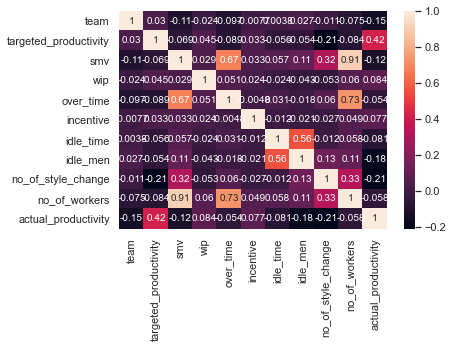

In [58]:
# Relationship between variables
corr = df_original.corr()
sn.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True)

Some of the independant variables display high correlation, it is the case of number of workers in each team and standard minute value which is the time allocated for a task. The variable number of workers and overtime seem to be positively highly correlated which is also the cases of the varaibles overtime and standard minute value. Targeted productivity and actual productivity display a weak correlation meaning the actual productivity barely meets the expected productivity.

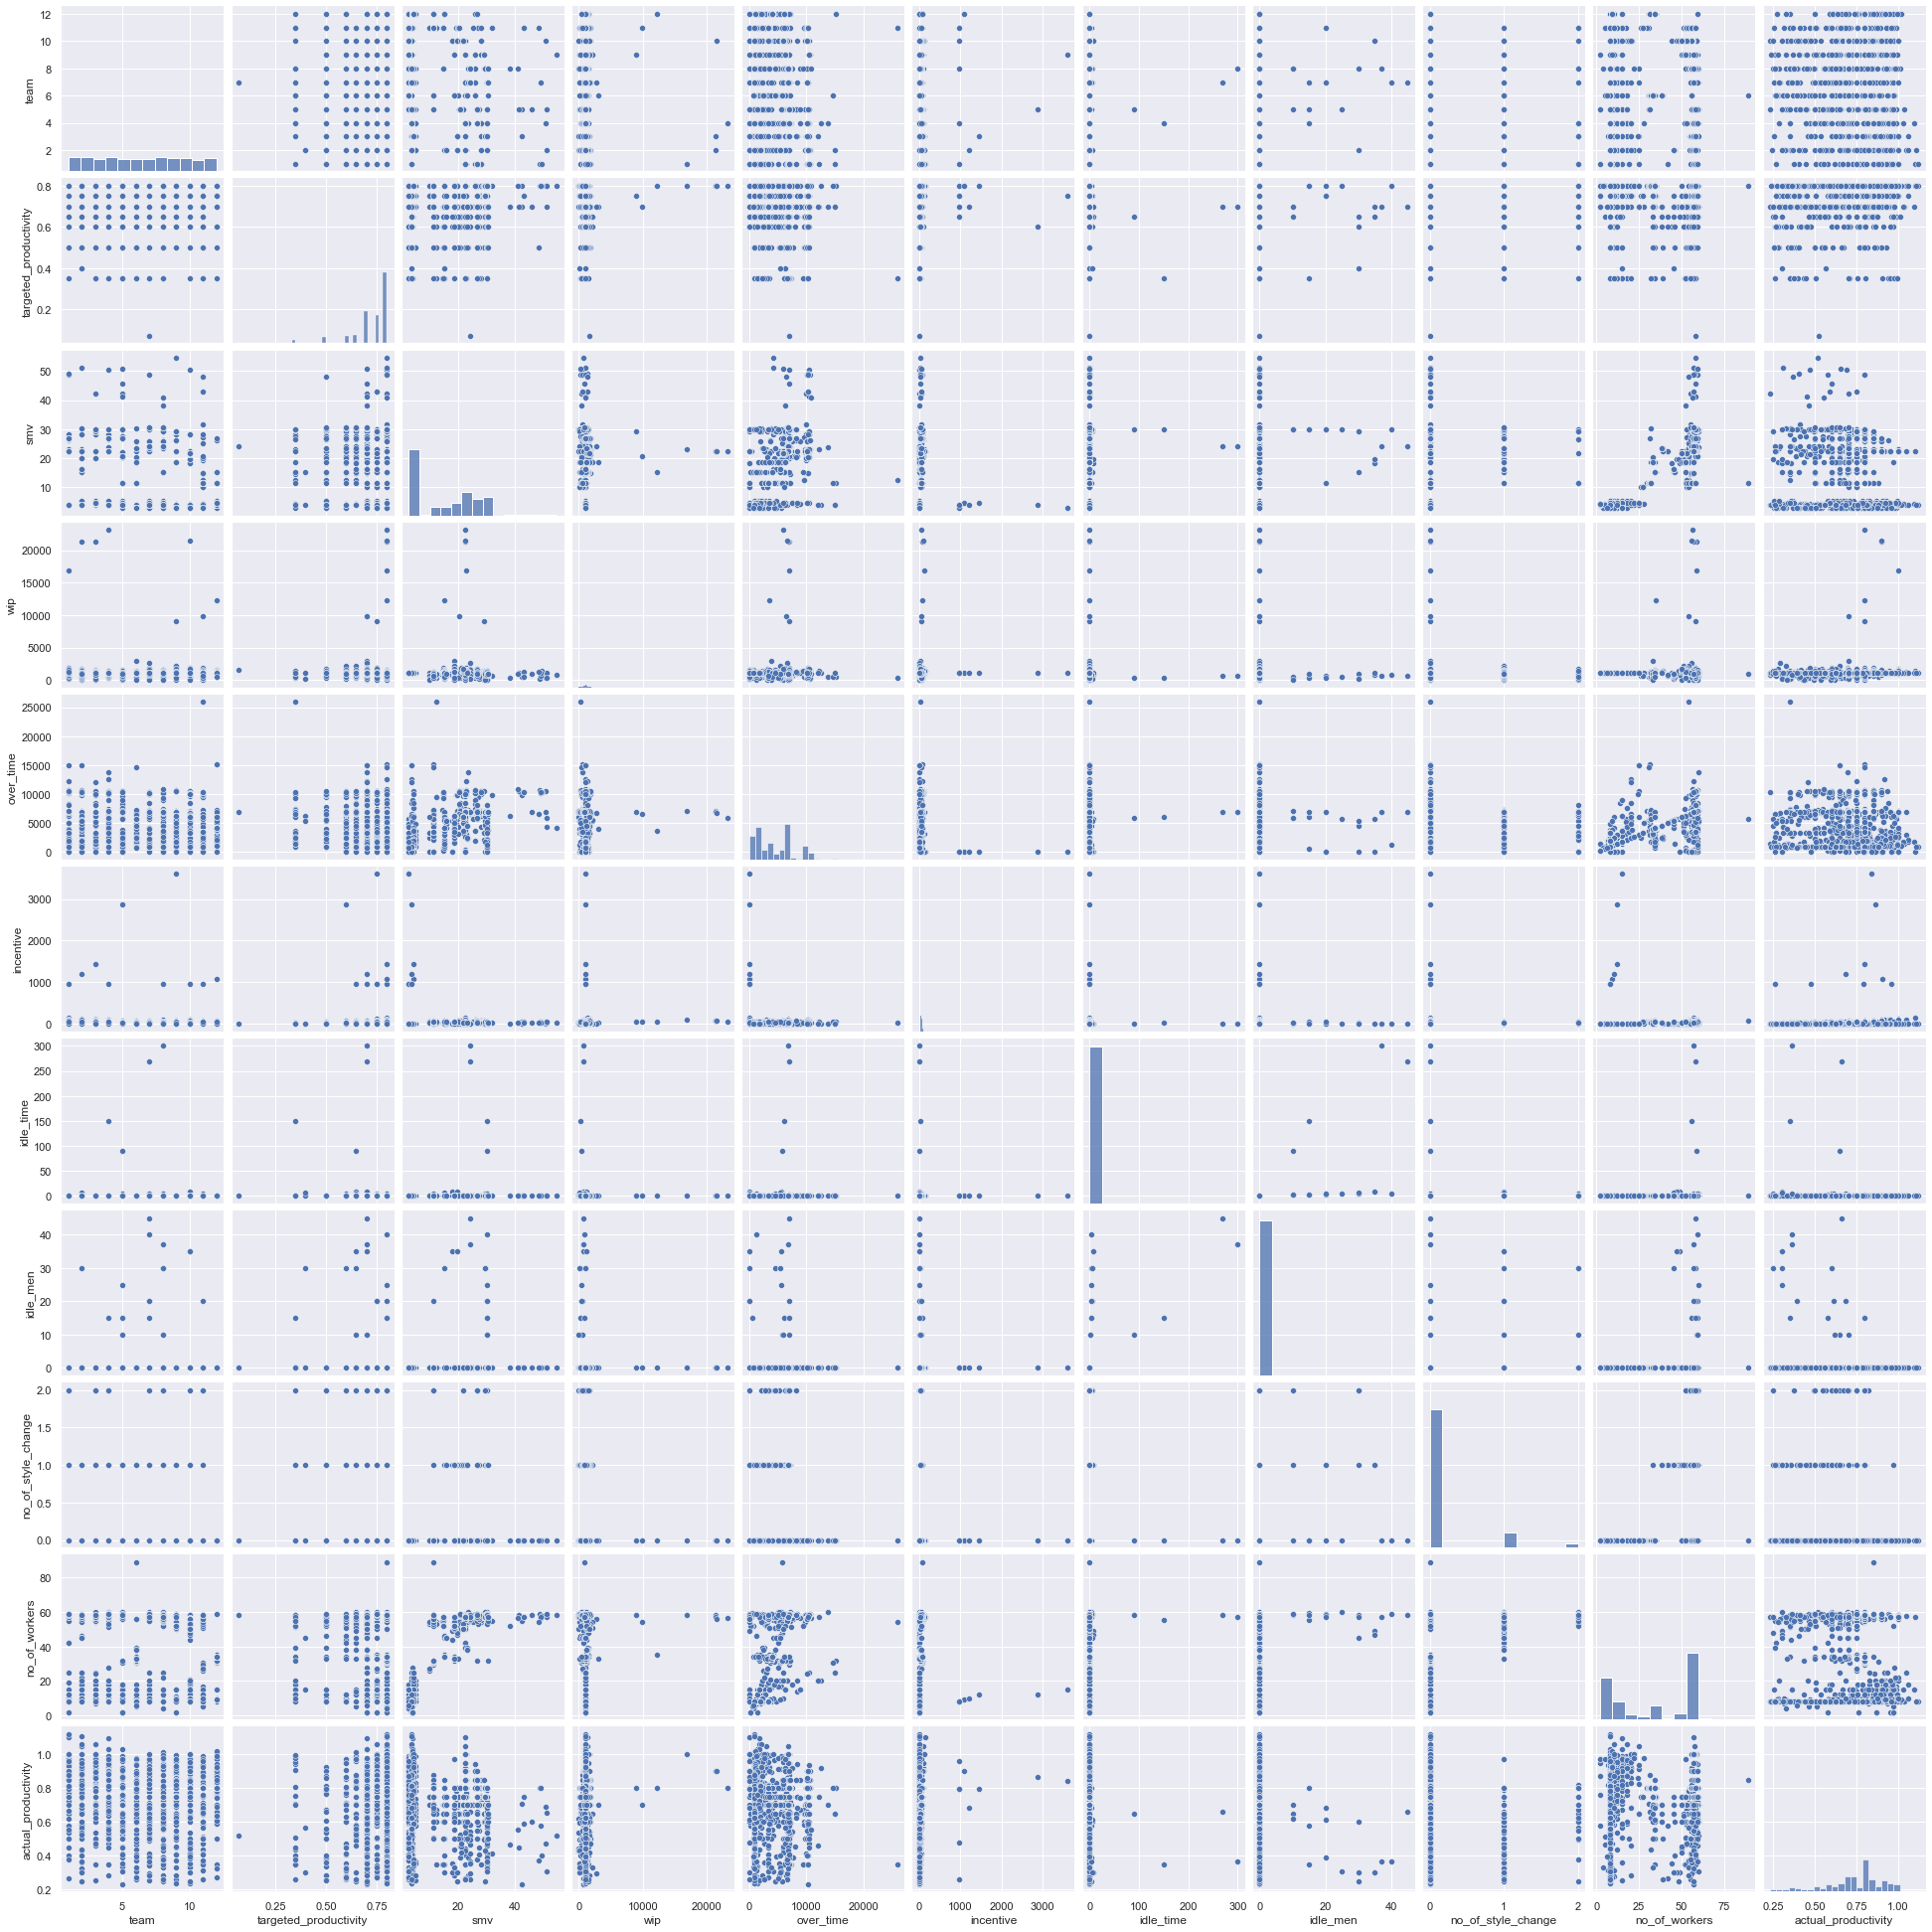

In [59]:
sn.pairplot(df_original)

In [60]:
#Correlation betweeen target variable and expalnatory variables
df_original.corr()['actual_productivity'].sort_values()

no_of_style_change      -0.207366
idle_men                -0.181734
team                    -0.148753
smv                     -0.122089
idle_time               -0.080851
no_of_workers           -0.057991
over_time               -0.054206
incentive                0.076538
wip                      0.083545
targeted_productivity    0.421594
actual_productivity      1.000000
Name: actual_productivity, dtype: float64

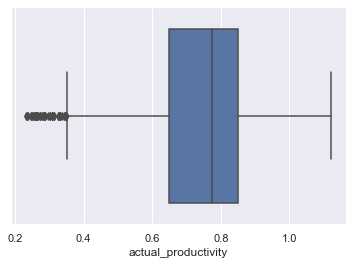

In [61]:
# Data Visualisation
sn.boxplot(x=df_original.actual_productivity )
plt.show()

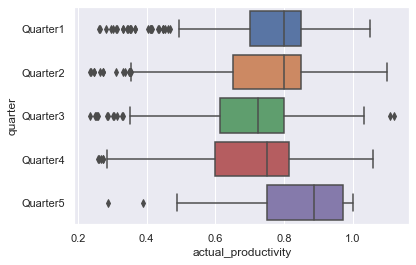

In [62]:
sn.boxplot(x=df_original.actual_productivity, y = df_original.quarter )
plt.show()

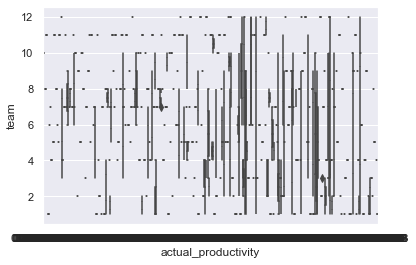

In [63]:
sn.boxplot(x=df_original.actual_productivity, y = df_original.team )
plt.show()

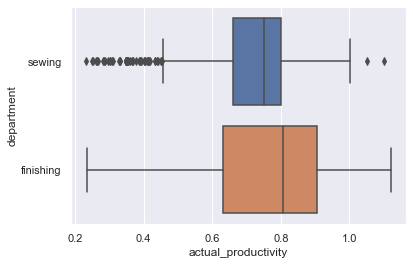

In [64]:
sn.boxplot(x=df_original.actual_productivity, y = df_original.department )
plt.show()

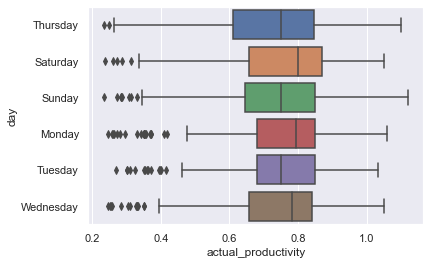

In [65]:
sn.boxplot(x=df_original.actual_productivity, y = df_original.day )
plt.show()

In [66]:
#average Productivity per team
p=df_original.groupby(['team'])[['actual_productivity']].mean()
p.head(12)

,actual_productivity
team,
1,0.821054
2,0.770855
3,0.803880
4,0.770035
5,0.697981
6,0.685385
7,0.668006
8,0.674148
9,0.734462


In [67]:
#average Productivity per day
p=df_original.groupby(['day'])[['actual_productivity']].mean()
p.head(12)

,actual_productivity
day,
Monday,0.735488
Saturday,0.751929
Sunday,0.728604
Thursday,0.722641
Tuesday,0.742701
Wednesday,0.730462


In [68]:
#average Productivity per quarter
p=df_original.groupby(['quarter'])[['actual_productivity']].mean()
p.head(12)

,actual_productivity
quarter,
Quarter1,0.751560
Quarter2,0.743710
Quarter3,0.704759
Quarter4,0.709067
Quarter5,0.826177


In [69]:
#average Productivity per department
p=df_original.groupby(['department'])[['actual_productivity', 'targeted_productivity']].mean()
p.head(12)

,actual_productivity,targeted_productivity
department,,
finishing,0.752951,0.737352
sewing,0.722013,0.723980


C:\Users\ESSOH GO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ShapiroResult(statistic=0.9439454078674316, pvalue=6.873566352140921e-21)

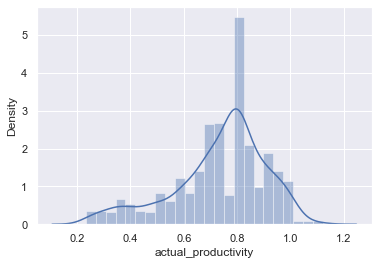

In [70]:
#check  charges distribution
sn.distplot(df_original.actual_productivity)
scipy.stats.shapiro(df_original.actual_productivity)

The graph combined with the results of the shapiro-wilk's test show that the distribution of our target variable is not normal.

## Data transformation

In [71]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1197 entries, 1/1/2015 to 3/11/2015
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 

In [72]:
df_original = df_original.reset_index()

In [73]:
# Create dummies for all categorical variables
dummies1 = pd.get_dummies(df_original.quarter)
dummies2 = pd.get_dummies(df_original.department)
dummies3 = pd.get_dummies(df_original.day)
dummies4 = pd.get_dummies(df_original.team)

In [74]:
# merge dummies dataframes
data1 = df_original.merge(dummies1, left_index=True, right_index=True)
data1.shape

(1197, 20)

In [75]:
data2 = data1.merge(dummies2, left_index=True, right_index=True)
data2.shape

(1197, 22)

In [76]:
data3 = data2.merge(dummies3, left_index=True, right_index=True)
data3.shape

(1197, 28)

In [77]:
data4 = data3.merge(dummies4, left_index=True, right_index=True)
data4.shape

(1197, 40)

In [78]:
data4.drop(columns=['quarter', 'department', 'day', 'team'], inplace=True)

In [79]:
data4.head()

,date,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,3,4,5,6,7,8,9,10,11,12
0,1/1/2015,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,...,0,0,0,0,0,1,0,0,0,0
1,1/1/2015,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,...,0,0,0,0,0,0,0,0,0,0
2,1/1/2015,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,0,0,0,0,0,0,0,0,1,0
3,1/1/2015,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,0,0,0,0,0,0,0,0,0,1
4,1/1/2015,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,...,0,0,0,1,0,0,0,0,0,0


In [80]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   targeted_productivity  1197 non-null   float64
 2   smv                    1197 non-null   float64
 3   wip                    1197 non-null   float64
 4   over_time              1197 non-null   int64  
 5   incentive              1197 non-null   int64  
 6   idle_time              1197 non-null   float64
 7   idle_men               1197 non-null   int64  
 8   no_of_style_change     1197 non-null   int64  
 9   no_of_workers          1197 non-null   float64
 10  actual_productivity    1197 non-null   float64
 11  Quarter1               1197 non-null   uint8  
 12  Quarter2               1197 non-null   uint8  
 13  Quarter3               1197 non-null   uint8  
 14  Quarter4               1197 non-null   uint8  
 15  Quar

In [81]:
data4.set_index('date', inplace=True)
data4.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,...,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,,,,,,,,,,
1/1/2015,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,...,0,0,0,0,0,1,0,0,0,0
1/1/2015,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500,...,0,0,0,0,0,0,0,0,0,0
1/1/2015,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,...,0,0,0,0,0,0,0,0,1,0
1/1/2015,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,...,0,0,0,0,0,0,0,0,0,1
1/1/2015,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,...,0,0,0,1,0,0,0,0,0,0


In [82]:
#Splitting features and target data
X = data4.drop(columns='actual_productivity')
y = data4.actual_productivity

## Validation process

In [83]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE:" + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE:0.16
R_squared: 0.2


## Feature Selection

In [84]:
# let's try to filter by variance
data4.var()

targeted_productivity    9.582641e-03
smv                      1.197540e+02
wip                      1.953434e+06
over_time                1.121462e+07
incentive                2.565848e+04
idle_time                1.615379e+02
idle_men                 1.068628e+01
no_of_style_change       1.830538e-01
no_of_workers            4.927373e+02
actual_productivity      3.044603e-02
Quarter1                 2.104760e-01
Quarter2                 2.017097e-01
Quarter3                 1.447808e-01
Quarter4                 1.643965e-01
Quarter5                 3.543698e-02
finishing                2.442324e-01
sewing                   2.442324e-01
Monday                   1.387261e-01
Saturday                 1.319282e-01
Sunday                   1.409474e-01
Thursday                 1.387261e-01
Tuesday                  1.398396e-01
Wednesday                1.436926e-01
1                        8.009153e-02
2                        8.283809e-02
3                        7.312736e-02
4           

Without normalizing the features, variances cannot be fully interpreted.

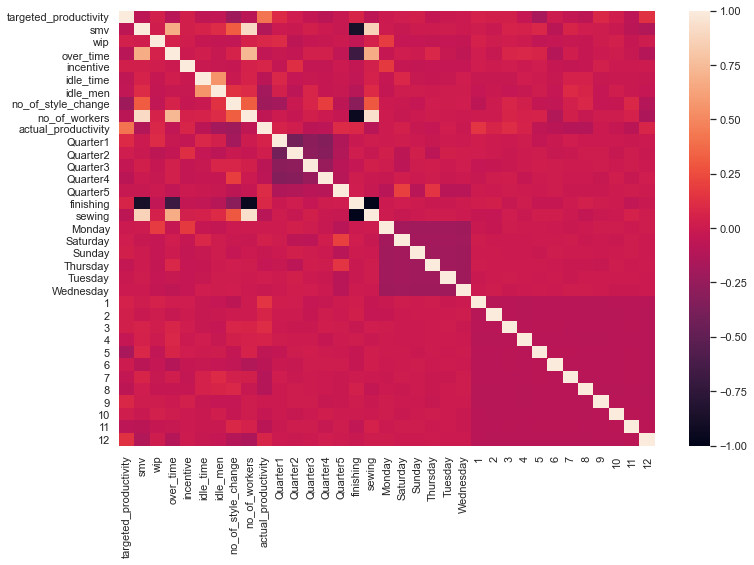

In [85]:
#Feature selection by correlation
fig_dims = (12,8)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(data4.corr(), ax=ax)
plt.show()

High multicolinearity between smv and overtime, between smv and sewing, and between smv and overtime and sewing and overtime.

In [114]:
#let's get th absolute values of the correlation with charges
abs(data4.corr()['actual_productivity'].sort_values())

no_of_style_change       0.207366
idle_men                 0.181734
smv                      0.122089
7                        0.113576
8                        0.110596
sewing                   0.087624
11                       0.085771
6                        0.083196
idle_time                0.080851
Quarter3                 0.080219
Quarter4                 0.076275
5                        0.061754
no_of_workers            0.057991
over_time                0.054206
Thursday                 0.031875
10                       0.026580
Sunday                   0.016808
Wednesday                0.012172
9                        0.001113
Monday                   0.001017
Tuesday                  0.019600
Quarter2                 0.030805
Saturday                 0.041539
Quarter1                 0.061925
4                        0.062125
2                        0.064903
12                       0.075689
incentive                0.076538
wip                      0.083545
finishing     

In [87]:
vals = [0.01,0.05,0.1,0.2,0.3]
for val in vals:
    features = abs(data4.corr()['actual_productivity'][abs(data4.corr()['actual_productivity'])>val].drop('actual_productivity')).index.tolist()
    
    #X = data_df.drop(columns='charges')
    X=X[features]
    
    print(features)
    
    y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
    print("RMSE:" + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
    print("R_squared: " + str(round(r2_score(y,y_pred),2)))

['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5', 'finishing', 'sewing', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12]
RMSE:0.16
R_squared: 0.2
['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'Quarter1', 'Quarter3', 'Quarter4', 'Quarter5', 'finishing', 'sewing', 1, 2, 3, 4, 5, 6, 7, 8, 11, 12]
RMSE:0.15
R_squared: 0.25
['targeted_productivity', 'smv', 'idle_men', 'no_of_style_change', 'Quarter5', 1, 3, 7, 8]
RMSE:0.15
R_squared: 0.29
['targeted_productivity', 'no_of_style_change']
RMSE:0.17
R_squared: 0.09
['targeted_productivity']
RMSE:0.17
R_squared: 0.06


From the above the list the best values of RMSE and R_squared will determine the features we retain. targeted_productivity', 'smv', 'idle_men', 'no_of_style_change', 'Quarter5', 1, 3, 7, 8 are the features retained. But multicolinearity has to be taken into account

In [88]:
#Feature Selection Using a Wrapper

In [89]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [90]:
sfs1 = SFS(classifier_pipeline, 
           k_features=1, 
           forward=False,
          scoring='neg_mean_squared_error',
          cv=cv)

X = data4.drop(columns=['actual_productivity',])

sfs1.fit(X,y)

sfs1.subsets_

{34: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33),
  'cv_scores': array([-0.02217048, -0.02452039, -0.02475115, -0.03049398, -0.01790418,
         -0.03147654, -0.02188821, -0.02468039, -0.02420185, -0.02207243]),
  'avg_score': -0.024415959632006157,
  'feature_names': ('targeted_productivity',
   'smv',
   'wip',
   'over_time',
   'incentive',
   'idle_time',
   'idle_men',
   'no_of_style_change',
   'no_of_workers',
   'Quarter1',
   'Quarter2',
   'Quarter3',
   'Quarter4',
   'Quarter5',
   'finishing',
   'sewing',
   'Monday',
   'Saturday',
   'Sunday',
   'Thursday',
   'Tuesday',
   'Wednesday',
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12)},
 33: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   1

The features with the lowest average score are 'targeted_productivity','smv','incentive','idle_men', 'no_of_workers', 'finishing', 'sewing', and team 5.

In [91]:
X1 = data4.drop(columns='actual_productivity')[['targeted_productivity','smv','incentive','idle_men', 'no_of_workers', 'finishing', 'sewing']]
y = data4['actual_productivity']
y_pred = cross_val_predict(classifier_pipeline, X1, y, cv=cv)
print("RMSE:" + str(round(sqrt(mean_squared_error(y,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y,y_pred),3)))

RMSE:0.134
R_squared: 0.406


At the end of the feature selection process, these features are retained for modelling: 'targeted_productivity','smv','incentive','idle_men', 'no_of_workers', 'finishing' and 'sewing'.

## Models

In [92]:
#Linear regression
cv = KFold(n_splits=10, random_state=0, shuffle=True)
classifier_pipeline = make_pipeline(StandardScaler(),  LinearRegression())

X = data4.drop(columns='actual_productivity')[['targeted_productivity','smv','incentive','idle_men', 'no_of_workers', 'finishing', 'sewing']]

y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE:" + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE:0.15
R_squared: 0.23


In [117]:
# Kneighbors Regressor
cv = KFold(n_splits=10, random_state=0, shuffle=True)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=18))
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE:" + str(round(sqrt(mean_squared_error(y,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE:0.133
R_squared: 0.42


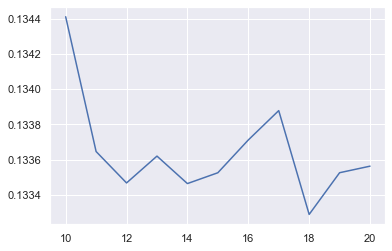

In [116]:
error = []
for k in range(10,21):
    classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
    y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
    error.append(sqrt(mean_squared_error(y,y_pred)))
    
plt.plot(range(10,21), error)

In [95]:
# XGboost regressor
from xgboost import XGBRegressor
classifier_pipeline = make_pipeline(StandardScaler(), XGBRegressor(objective= 'reg:squarederror',
                                                  learning_rate = 0.1,
                                                  n_estimators =100, 
                                                  max_depth = 3, 
                                                  seed = 0))
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE:" + str(round(sqrt(mean_squared_error(y,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE:0.13
R_squared: 0.47


In [96]:
#XGboost tuning
from sklearn.model_selection import RandomizedSearchCV
vals = [10,50,100,150,200, 250, 300, 350, 400]
for val in vals:
    classifier_pipeline = make_pipeline(StandardScaler(), XGBRegressor(objective= 'reg:squarederror',
                                                  learning_rate = 0.1,
                                                  n_estimators =val, 
                                                  max_depth = 3, 
                                                  seed = 0))
    y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
    print("RMSE:" + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
    print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE:0.17
R_squared: 0.1
RMSE:0.13
R_squared: 0.46
RMSE:0.13
R_squared: 0.47
RMSE:0.13
R_squared: 0.47
RMSE:0.13
R_squared: 0.47
RMSE:0.13
R_squared: 0.47
RMSE:0.13
R_squared: 0.47
RMSE:0.13
R_squared: 0.46
RMSE:0.13
R_squared: 0.46


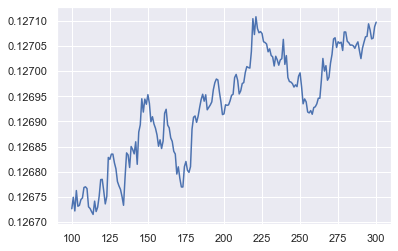

In [100]:
#range 100 to 301
error1 =[]
for k in range(100,301):
    classifier_pipeline = make_pipeline(StandardScaler(), XGBRegressor(objective= 'reg:squarederror',
                                                  learning_rate = 0.1,
                                                  n_estimators =k, 
                                                  max_depth = 3, 
                                                  seed = 0))
    y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
    error1.append(sqrt(mean_squared_error(y,y_pred)))
    
plt.plot(range(100,301), error1)

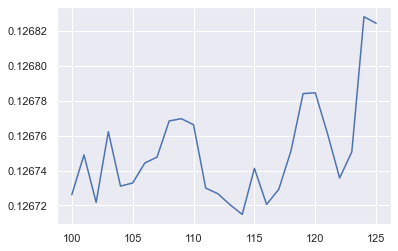

In [102]:
#Let's focus on range 100 to 126
error2 =[]
for k in range(100,126):
    classifier_pipeline = make_pipeline(StandardScaler(), XGBRegressor(objective= 'reg:squarederror',
                                                  learning_rate = 0.1,
                                                  n_estimators =k, 
                                                  max_depth = 3, 
                                                  seed = 0))
    y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
    error2.append(sqrt(mean_squared_error(y,y_pred)))
    
plt.plot(range(100,126), error2)

In [111]:
classifier_pipeline = make_pipeline(StandardScaler(), XGBRegressor(objective= 'reg:squarederror',
                                                  learning_rate = 0.1,
                                                  n_estimators =114, 
                                                  max_depth = 3, 
                                                  seed = 0))
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE:" + str(round(sqrt(mean_squared_error(y,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE:0.127
R_squared: 0.47
